In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [15]:
msci_folder = "C:/Users/Sahil Nathani/Desktop/Python and ML Material/Databases/Spanish Stock Data"
mscifile = glob.glob(msci_folder + "\*.csv")

dataframes = []
for file in mscifile:
    df = pd.read_csv(file)
    dataframes.append(df)

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


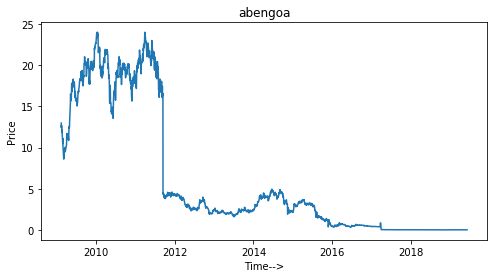

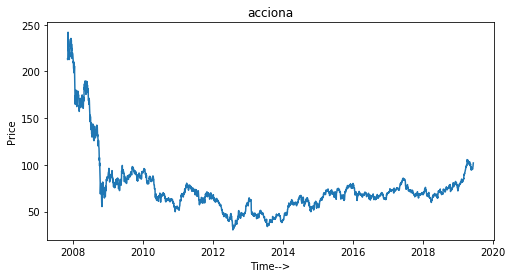

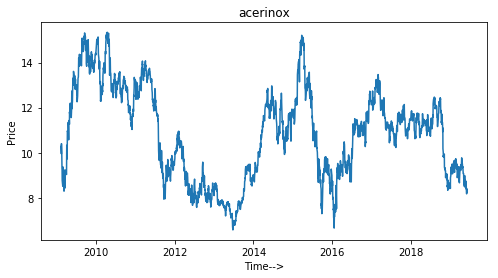

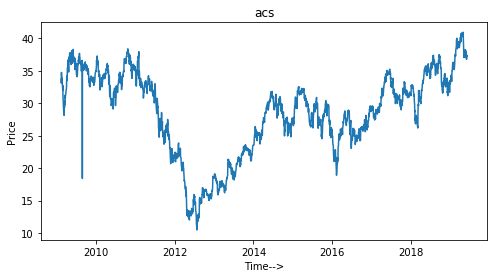

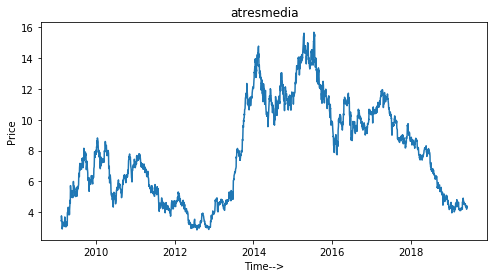

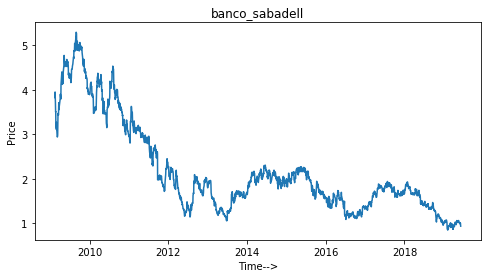

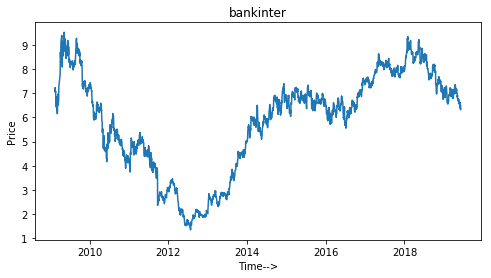

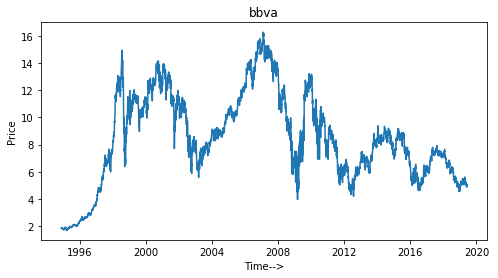

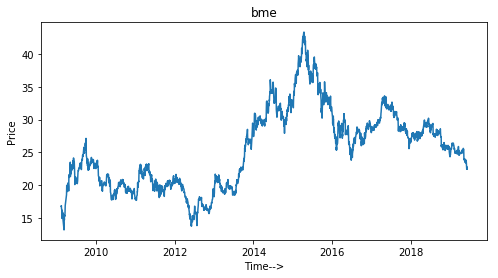

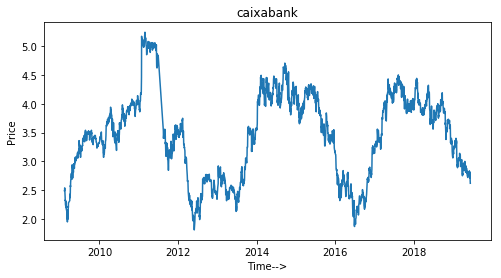

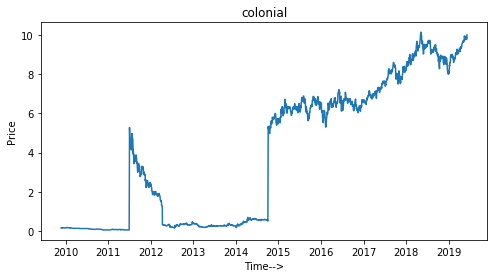

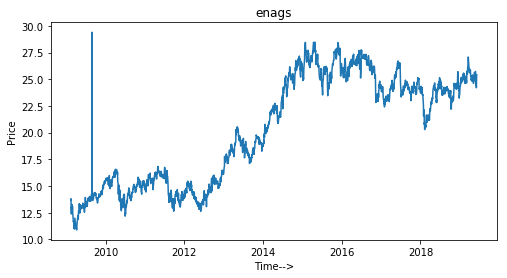

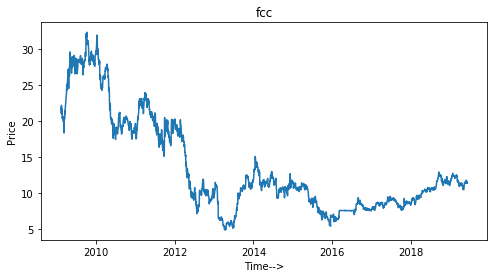

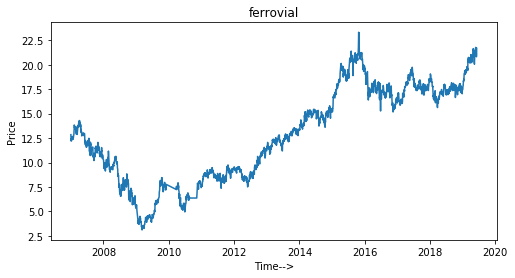

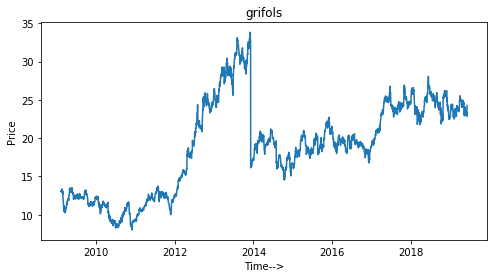

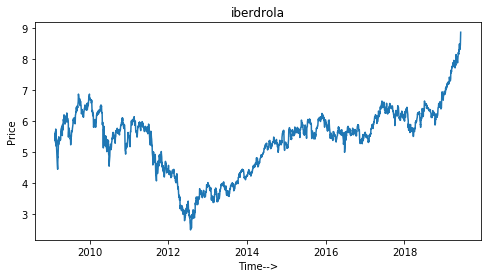

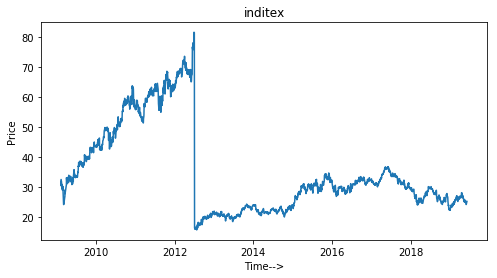

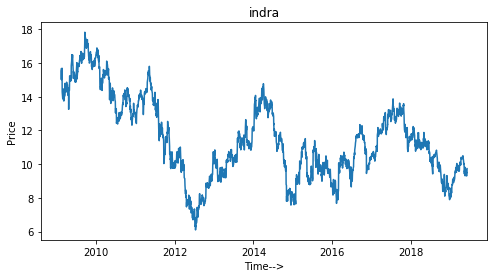

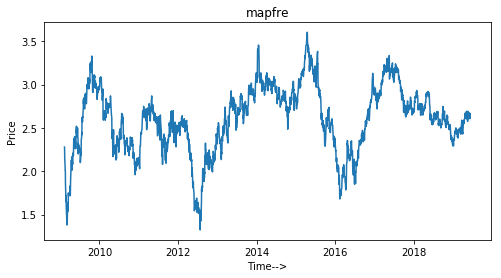

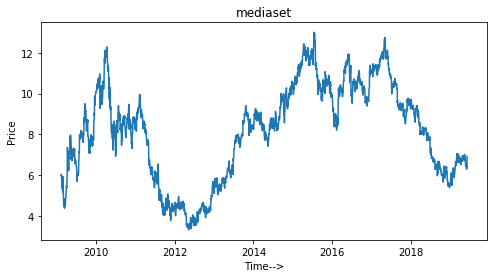

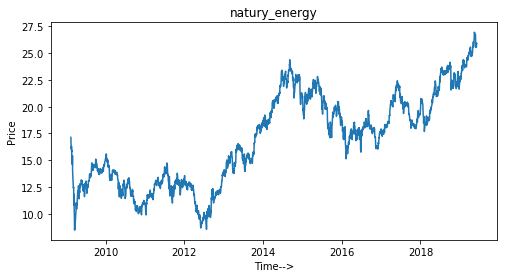

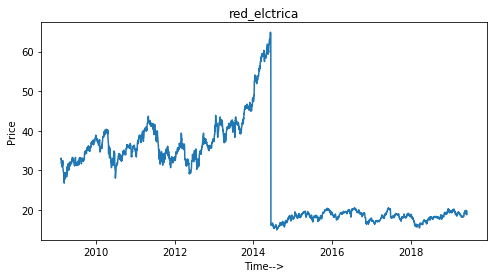

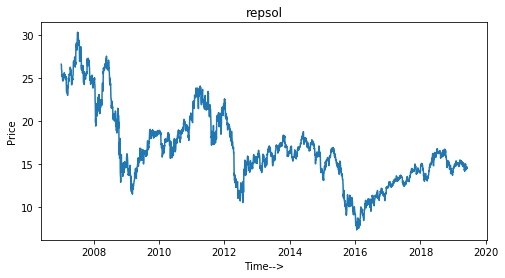

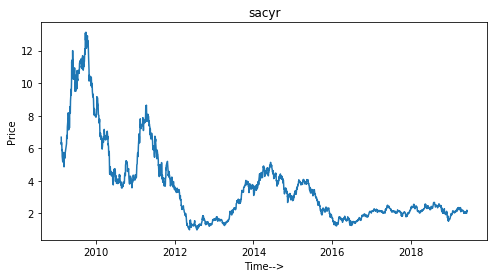

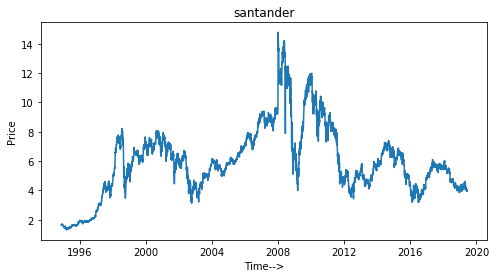

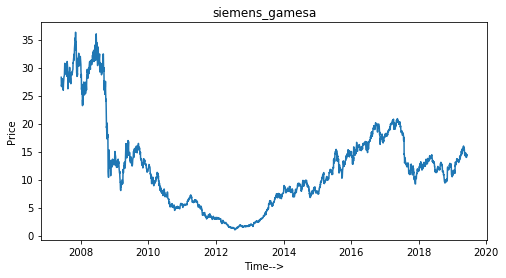

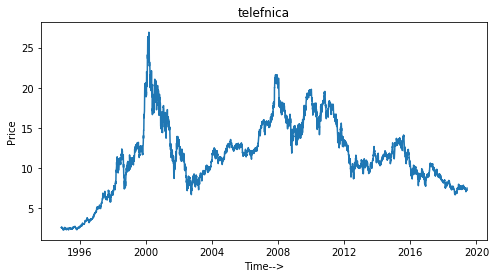

In [25]:
titles = ['abengoa', 'acciona', 'acerinox', 'acs', 'atresmedia', 'banco_sabadell', 'bankinter', 'bbva', 'bme', 'caixabank', 
          'colonial', 'enags', 'fcc', 'ferrovial', 'grifols', 'iberdrola', 'inditex', 'indra', 'mapfre', 'mediaset', 
          'natury_energy', 'red_elctrica', 'repsol', 'sacyr', 'santander', 'siemens_gamesa', 'telefnica']
for df, title in zip(dataframes, titles):
    plt.figure(figsize=(8, 4))
    plt.xlabel('Time-->')
    plt.ylabel('Price')
    plt.title(title)
    df['Date'] = pd.to_datetime(df.Date, format="%Y-%m-%d")
    df.index = df['Date']
    plt.plot(df['Close'])

In [83]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Dropout, Activation

def create_dataset(df, look_back):
    x, y = [], []
    for i in range(len(df)-look_back-1):
        a = df[i:(i+look_back), 0]
        x.append(a)
        y.append(df[i + look_back, 0])
    print(x, y)    
    return np.array(x), np.array(y)

def predictions(df, label):
    df = df[['Date', 'Close']]
    df.index = df['Date']
    df = df.drop(['Date'], axis=1)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df)
    train_size = int(0.8*len(df))
    train = df[:train_size, :]
    test = df[train_size:, :]
    look_back = 1
    x_train, y_train = create_dataset(train, look_back) 
    x_test, y_test = create_dataset(test, look_back)
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    
    model = Sequential()
    model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))
    
    model.compile(optimizer='rmsprop', loss='mse')
    print('Fitting for', label, '\n\n')
    model.fit(x_train, y_train, batch_size=128, epochs=12, validation_split=0.05)
    x_pred = model.predict(x_test)
    print(scaler.inverse_transform(x_pred)[-1])
    plt.figure(figsize=(8, 4))
    plt.title('Actual vs Predicted for '+label.upper())
    plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label='Actual Value')
    plt.plot(scaler.inverse_transform(x_pred), label='Predicted Value')
    plt.legend(loc='best')

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for abengoa 


Train on 1976 samples, validate on 105 samples
Epoch 1/12
1976/1976 [==============================] - 15s 8ms/step - loss: 0.1459 - val_loss: 0.0171
Epoch 2/12
1976/1976 [==============================] - 1s 273us/step - loss: 0.0669 - val_loss: 0.0478
Epoch 3/12
1976/1976 [==============================] - 1s 277us/step - loss: 0.0374 - val_loss: 0.0317
Epoch 4/12
1976/1976 [==============================] - 1s 280us/step - loss: 0.0158 - val_loss: 0.0097
Epoch 5/12
1976/1976 [==============================] - 1s 292us/step - loss: 0.0043 - val_loss: 3.3836e-04
Epoch 6/12
1976/1976 [==============================] - 1s 291us/step - loss: 0.0023 - val_loss: 2.0852e-04
Epoch 7/12
1976/1976 [==============================] - 1s 281us/step - loss: 0.0022 - val_loss: 1.9245e-04
Epoch 8/12
1976/1976 [==============================] - 1s 352us/step - loss: 0.0022 - val_loss: 2.1811e-05
Epoch 9/12
1976/1976 [==============================] - 1s 305us/step - loss: 0.002

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for acciona 


Train on 2220 samples, validate on 117 samples
Epoch 1/12
2220/2220 [==============================] - 19s 9ms/step - loss: 0.0445 - val_loss: 6.6068e-04
Epoch 2/12
2220/2220 [==============================] - 1s 252us/step - loss: 0.0191 - val_loss: 0.0012
Epoch 3/12
2220/2220 [==============================] - 1s 292us/step - loss: 0.0125 - val_loss: 3.1542e-04
Epoch 4/12
2220/2220 [==============================] - 1s 401us/step - loss: 0.0056 - val_loss: 4.9672e-05
Epoch 5/12
2220/2220 [==============================] - 1s 399us/step - loss: 0.0016 - val_loss: 6.8838e-05
Epoch 6/12
2220/2220 [==============================] - 1s 532us/step - loss: 9.0178e-04 - val_loss: 3.3781e-04
Epoch 7/12
2220/2220 [==============================] - 1s 519us/step - loss: 7.9583e-04 - val_loss: 1.2979e-05
Epoch 8/12
2220/2220 [==============================] - 1s 598us/step - loss: 8.5567e-04 - val_loss: 1.0508e-04
Epoch 9/12
2220/2220 [==============================] - 1s 

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for acerinox 


Train on 1976 samples, validate on 105 samples
Epoch 1/12
1976/1976 [==============================] - 15s 7ms/step - loss: 0.2082 - val_loss: 0.1798
Epoch 2/12
1976/1976 [==============================] - 1s 277us/step - loss: 0.0721 - val_loss: 0.0305
Epoch 3/12
1976/1976 [==============================] - 1s 254us/step - loss: 0.0266 - val_loss: 0.0060
Epoch 4/12
1976/1976 [==============================] - 1s 263us/step - loss: 0.0194 - val_loss: 0.0038
Epoch 5/12
1976/1976 [==============================] - 1s 261us/step - loss: 0.0114 - val_loss: 0.0033
Epoch 6/12
1976/1976 [==============================] - 1s 264us/step - loss: 0.0055 - val_loss: 6.9615e-04
Epoch 7/12
1976/1976 [==============================] - 1s 284us/step - loss: 0.0036 - val_loss: 0.0010
Epoch 8/12
1976/1976 [==============================] - 1s 296us/step - loss: 0.0033 - val_loss: 5.3174e-04
Epoch 9/12
1976/1976 [==============================] - 1s 301us/step - loss: 0.0033 - val

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for acs 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 18s 9ms/step - loss: 0.2335 - val_loss: 0.1674
Epoch 2/12
1977/1977 [==============================] - 1s 469us/step - loss: 0.0743 - val_loss: 0.0257
Epoch 3/12
1977/1977 [==============================] - 1s 398us/step - loss: 0.0195 - val_loss: 0.0032
Epoch 4/12
1977/1977 [==============================] - 1s 485us/step - loss: 0.0147 - val_loss: 0.0019
Epoch 5/12
1977/1977 [==============================] - 1s 515us/step - loss: 0.0113 - val_loss: 0.0013
Epoch 6/12
1977/1977 [==============================] - 1s 630us/step - loss: 0.0072 - val_loss: 4.9956e-04
Epoch 7/12
1977/1977 [==============================] - 1s 662us/step - loss: 0.0048 - val_loss: 6.6705e-04
Epoch 8/12
1977/1977 [==============================] - 1s 509us/step - loss: 0.0039 - val_loss: 5.6349e-04
Epoch 9/12
1977/1977 [==============================] - 1s 457us/step - loss: 0.0036 - val_

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for atresmedia 


Train on 1975 samples, validate on 104 samples
Epoch 1/12
1975/1975 [==============================] - 20s 10ms/step - loss: 0.1572 - val_loss: 0.1602
Epoch 2/12
1975/1975 [==============================] - 1s 463us/step - loss: 0.0567 - val_loss: 0.0313
Epoch 3/12
1975/1975 [==============================] - 1s 418us/step - loss: 0.0285 - val_loss: 0.0144
Epoch 4/12
1975/1975 [==============================] - 1s 365us/step - loss: 0.0179 - val_loss: 0.0085
Epoch 5/12
1975/1975 [==============================] - 1s 398us/step - loss: 0.0077 - val_loss: 8.4137e-04
Epoch 6/12
1975/1975 [==============================] - 1s 406us/step - loss: 0.0029 - val_loss: 2.7530e-04
Epoch 7/12
1975/1975 [==============================] - 1s 426us/step - loss: 0.0024 - val_loss: 0.0021
Epoch 8/12
1975/1975 [==============================] - 1s 414us/step - loss: 0.0024 - val_loss: 6.0034e-04
Epoch 9/12
1975/1975 [==============================] - 1s 372us/step - loss: 0.002

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for banco_sabadell 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 20s 10ms/step - loss: 0.1122 - val_loss: 0.0012
Epoch 2/12
1977/1977 [==============================] - 1s 328us/step - loss: 0.0386 - val_loss: 0.0162
Epoch 3/12
1977/1977 [==============================] - 1s 373us/step - loss: 0.0218 - val_loss: 0.0142
Epoch 4/12
1977/1977 [==============================] - 1s 437us/step - loss: 0.0119 - val_loss: 0.0048
Epoch 5/12
1977/1977 [==============================] - 1s 423us/step - loss: 0.0043 - val_loss: 0.0010
Epoch 6/12
1977/1977 [==============================] - 1s 417us/step - loss: 0.0018 - val_loss: 2.8076e-04
Epoch 7/12
1977/1977 [==============================] - 1s 418us/step - loss: 0.0018 - val_loss: 2.1244e-04
Epoch 8/12
1977/1977 [==============================] - 1s 398us/step - loss: 0.0018 - val_loss: 2.7534e-04
Epoch 9/12
1977/1977 [==============================] - 1s 442us/step - loss: 0

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for bankinter 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 19s 10ms/step - loss: 0.1913 - val_loss: 0.2720
Epoch 2/12
1977/1977 [==============================] - 1s 341us/step - loss: 0.0617 - val_loss: 0.0635
Epoch 3/12
1977/1977 [==============================] - 1s 341us/step - loss: 0.0236 - val_loss: 0.0266
Epoch 4/12
1977/1977 [==============================] - 1s 365us/step - loss: 0.0177 - val_loss: 0.0149
Epoch 5/12
1977/1977 [==============================] - 1s 383us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 6/12
1977/1977 [==============================] - 1s 420us/step - loss: 0.0054 - val_loss: 7.4593e-04
Epoch 7/12
1977/1977 [==============================] - 1s 475us/step - loss: 0.0036 - val_loss: 5.8734e-04
Epoch 8/12
1977/1977 [==============================] - 1s 519us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 9/12
1977/1977 [==============================] - 1s 394us/step - loss: 0.0029 - v

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for bbva 


Train on 4721 samples, validate on 249 samples
Epoch 1/12
4721/4721 [==============================] - 21s 5ms/step - loss: 0.1229 - val_loss: 0.0010
Epoch 2/12
4721/4721 [==============================] - 2s 375us/step - loss: 0.0174 - val_loss: 0.0015
Epoch 3/12
4721/4721 [==============================] - 2s 397us/step - loss: 0.0051 - val_loss: 7.5651e-05
Epoch 4/12
4721/4721 [==============================] - 2s 423us/step - loss: 0.0031 - val_loss: 8.5860e-05
Epoch 5/12
4721/4721 [==============================] - 2s 385us/step - loss: 0.0029 - val_loss: 3.0960e-04
Epoch 6/12
4721/4721 [==============================] - 2s 412us/step - loss: 0.0028 - val_loss: 7.1757e-05
Epoch 7/12
4721/4721 [==============================] - 2s 421us/step - loss: 0.0025 - val_loss: 8.5902e-05
Epoch 8/12
4721/4721 [==============================] - 2s 399us/step - loss: 0.0023 - val_loss: 7.6087e-04
Epoch 9/12
4721/4721 [==============================] - ETA: 0s - loss: 0.002 

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for bme 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 22s 11ms/step - loss: 0.1300 - val_loss: 0.1207
Epoch 2/12
1977/1977 [==============================] - 1s 388us/step - loss: 0.0420 - val_loss: 0.0216
Epoch 3/12
1977/1977 [==============================] - 1s 451us/step - loss: 0.0202 - val_loss: 0.0083
Epoch 4/12
1977/1977 [==============================] - 1s 586us/step - loss: 0.0139 - val_loss: 0.0046
Epoch 5/12
1977/1977 [==============================] - 1s 546us/step - loss: 0.0071 - val_loss: 0.0017
Epoch 6/12
1977/1977 [==============================] - 1s 436us/step - loss: 0.0027 - val_loss: 1.2592e-04
Epoch 7/12
1977/1977 [==============================] - 1s 381us/step - loss: 0.0020 - val_loss: 6.3848e-04
Epoch 8/12
1977/1977 [==============================] - 1s 365us/step - loss: 0.0020 - val_loss: 1.3530e-04
Epoch 9/12
1977/1977 [==============================] - 1s 376us/step - loss: 0.0020 - val

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for caixabank 


Train on 1951 samples, validate on 103 samples
Epoch 1/12
1951/1951 [==============================] - 21s 11ms/step - loss: 0.1781 - val_loss: 0.1204
Epoch 2/12
1951/1951 [==============================] - 1s 401us/step - loss: 0.0584 - val_loss: 0.0188
Epoch 3/12
1951/1951 [==============================] - 1s 477us/step - loss: 0.0227 - val_loss: 0.0061
Epoch 4/12
1951/1951 [==============================] - 1s 505us/step - loss: 0.0170 - val_loss: 0.0025
Epoch 5/12
1951/1951 [==============================] - 1s 507us/step - loss: 0.0104 - val_loss: 0.0011
Epoch 6/12
1951/1951 [==============================] - 1s 518us/step - loss: 0.0055 - val_loss: 0.0014
Epoch 7/12
1951/1951 [==============================] - 1s 500us/step - loss: 0.0031 - val_loss: 9.1004e-04
Epoch 8/12
1951/1951 [==============================] - 1s 581us/step - loss: 0.0029 - val_loss: 5.4180e-04
Epoch 9/12
1951/1951 [==============================] - 1s 499us/step - loss: 0.0029 - v

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for colonial 


Train on 1702 samples, validate on 90 samples
Epoch 1/12
1702/1702 [==============================] - 20s 12ms/step - loss: 0.1140 - val_loss: 0.2675
Epoch 2/12
1702/1702 [==============================] - 1s 529us/step - loss: 0.0554 - val_loss: 0.1098
Epoch 3/12
1702/1702 [==============================] - 1s 605us/step - loss: 0.0342 - val_loss: 0.0522
Epoch 4/12
1702/1702 [==============================] - 1s 557us/step - loss: 0.0191 - val_loss: 0.0153
Epoch 5/12
1702/1702 [==============================] - 1s 581us/step - loss: 0.0068 - val_loss: 0.0013
Epoch 6/12
1702/1702 [==============================] - 1s 611us/step - loss: 0.0023 - val_loss: 9.4703e-05
Epoch 7/12
1702/1702 [==============================] - 1s 534us/step - loss: 0.0018 - val_loss: 9.9310e-05
Epoch 8/12
1702/1702 [==============================] - 1s 476us/step - loss: 0.0018 - val_loss: 3.6692e-04
Epoch 9/12
1702/1702 [==============================] - 1s 454us/step - loss: 0.0019 -

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for enags 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 23s 11ms/step - loss: 0.2000 - val_loss: 0.2162
Epoch 2/12
1977/1977 [==============================] - 1s 430us/step - loss: 0.0739 - val_loss: 0.0452
Epoch 3/12
1977/1977 [==============================] - 1s 448us/step - loss: 0.0312 - val_loss: 0.0133
Epoch 4/12
1977/1977 [==============================] - 1s 503us/step - loss: 0.0206 - val_loss: 0.0048
Epoch 5/12
1977/1977 [==============================] - 1s 570us/step - loss: 0.0105 - val_loss: 0.0040
Epoch 6/12
1977/1977 [==============================] - 1s 530us/step - loss: 0.0046 - val_loss: 2.1659e-04
Epoch 7/12
1977/1977 [==============================] - 1s 513us/step - loss: 0.0032 - val_loss: 1.8774e-04
Epoch 8/12
1977/1977 [==============================] - 1s 516us/step - loss: 0.0037 - val_loss: 2.6958e-04
Epoch 9/12
1977/1977 [==============================] - ETA: 0s - loss: 0.003 - 1s 525us

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for fcc 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 23s 12ms/step - loss: 0.1324 - val_loss: 8.8981e-04
Epoch 2/12
1977/1977 [==============================] - 1s 549us/step - loss: 0.0528 - val_loss: 0.0214
Epoch 3/12
1977/1977 [==============================] - 1s 580us/step - loss: 0.0285 - val_loss: 0.0227
Epoch 4/12
1977/1977 [==============================] - 1s 493us/step - loss: 0.0166 - val_loss: 0.0102
Epoch 5/12
1977/1977 [==============================] - 1s 484us/step - loss: 0.0060 - val_loss: 0.0018
Epoch 6/12
1977/1977 [==============================] - 1s 478us/step - loss: 0.0025 - val_loss: 4.1473e-04
Epoch 7/12
1977/1977 [==============================] - 1s 459us/step - loss: 0.0021 - val_loss: 2.0242e-04
Epoch 8/12
1977/1977 [==============================] - 1s 554us/step - loss: 0.0019 - val_loss: 2.8969e-04
Epoch 9/12
1977/1977 [==============================] - 1s 604us/step - loss: 0.0019 -

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for ferrovial 


Train on 2308 samples, validate on 122 samples
Epoch 1/12
2308/2308 [==============================] - 23s 10ms/step - loss: 0.1428 - val_loss: 0.1643
Epoch 2/12
2308/2308 [==============================] - 1s 481us/step - loss: 0.0395 - val_loss: 0.0252
Epoch 3/12
2308/2308 [==============================] - 1s 559us/step - loss: 0.0193 - val_loss: 0.0217
Epoch 4/12
2308/2308 [==============================] - 1s 549us/step - loss: 0.0128 - val_loss: 9.6608e-04
Epoch 5/12
2308/2308 [==============================] - 1s 539us/step - loss: 0.0060 - val_loss: 0.0061
Epoch 6/12
2308/2308 [==============================] - 1s 562us/step - loss: 0.0028 - val_loss: 1.1776e-04
Epoch 7/12
2308/2308 [==============================] - 1s 537us/step - loss: 0.0020 - val_loss: 0.0012
Epoch 8/12
2308/2308 [==============================] - 1s 612us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/12
2308/2308 [==============================] - 1s 560us/step - loss: 0.0022 - v

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for grifols 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 24s 12ms/step - loss: 0.1278 - val_loss: 0.1037
Epoch 2/12
1977/1977 [==============================] - 1s 492us/step - loss: 0.0442 - val_loss: 0.0187
Epoch 3/12
1977/1977 [==============================] - 1s 581us/step - loss: 0.0226 - val_loss: 0.0074
Epoch 4/12
1977/1977 [==============================] - 1s 544us/step - loss: 0.0148 - val_loss: 0.0042
Epoch 5/12
1977/1977 [==============================] - 1s 599us/step - loss: 0.0064 - val_loss: 6.3138e-04
Epoch 6/12
1977/1977 [==============================] - 1s 628us/step - loss: 0.0026 - val_loss: 1.1270e-04
Epoch 7/12
1977/1977 [==============================] - 1s 607us/step - loss: 0.0022 - val_loss: 2.7763e-04
Epoch 8/12
1977/1977 [==============================] - 1s 542us/step - loss: 0.0021 - val_loss: 5.5539e-04
Epoch 9/12
1977/1977 [==============================] - 1s 546us/step - loss: 0.00

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for iberdrola 


Train on 1976 samples, validate on 105 samples
Epoch 1/12
1976/1976 [==============================] - 24s 12ms/step - loss: 0.1177 - val_loss: 0.0887
Epoch 2/12
1976/1976 [==============================] - 1s 446us/step - loss: 0.0281 - val_loss: 0.0109
Epoch 3/12
1976/1976 [==============================] - 1s 450us/step - loss: 0.0103 - val_loss: 0.0044
Epoch 4/12
1976/1976 [==============================] - 1s 454us/step - loss: 0.0087 - val_loss: 0.0041
Epoch 5/12
1976/1976 [==============================] - 1s 472us/step - loss: 0.0063 - val_loss: 0.0020
Epoch 6/12
1976/1976 [==============================] - 1s 620us/step - loss: 0.0039 - val_loss: 2.6901e-04
Epoch 7/12
1976/1976 [==============================] - 1s 664us/step - loss: 0.0025 - val_loss: 1.2213e-04
Epoch 8/12
1976/1976 [==============================] - 1s 585us/step - loss: 0.0020 - val_loss: 8.1465e-04
Epoch 9/12
1976/1976 [==============================] - 1s 564us/step - loss: 0.0019

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for inditex 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 22s 11ms/step - loss: 0.1119 - val_loss: 0.0074
Epoch 2/12
1977/1977 [==============================] - 1s 423us/step - loss: 0.0451 - val_loss: 0.0024
Epoch 3/12
1977/1977 [==============================] - 1s 428us/step - loss: 0.0264 - val_loss: 0.0037
Epoch 4/12
1977/1977 [==============================] - 1s 427us/step - loss: 0.0157 - val_loss: 0.0022
Epoch 5/12
1977/1977 [==============================] - 1s 431us/step - loss: 0.0056 - val_loss: 1.3908e-04
Epoch 6/12
1977/1977 [==============================] - 1s 431us/step - loss: 0.0022 - val_loss: 3.4325e-05
Epoch 7/12
1977/1977 [==============================] - 1s 451us/step - loss: 0.0021 - val_loss: 5.8256e-05
Epoch 8/12
1977/1977 [==============================] - 1s 476us/step - loss: 0.0021 - val_loss: 1.4285e-04
Epoch 9/12
1977/1977 [==============================] - 1s 461us/step - loss: 0.00

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for indra 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 21s 11ms/step - loss: 0.1794 - val_loss: 0.0617
Epoch 2/12
1977/1977 [==============================] - 1s 445us/step - loss: 0.0533 - val_loss: 0.0033
Epoch 3/12
1977/1977 [==============================] - 1s 444us/step - loss: 0.0194 - val_loss: 0.0022
Epoch 4/12
1977/1977 [==============================] - 1s 450us/step - loss: 0.0142 - val_loss: 0.0017
Epoch 5/12
1977/1977 [==============================] - 1s 447us/step - loss: 0.0085 - val_loss: 6.1887e-04
Epoch 6/12
1977/1977 [==============================] - 1s 451us/step - loss: 0.0045 - val_loss: 5.9903e-04
Epoch 7/12
1977/1977 [==============================] - 1s 451us/step - loss: 0.0030 - val_loss: 5.5644e-04
Epoch 8/12
1977/1977 [==============================] - 1s 447us/step - loss: 0.0027 - val_loss: 2.8347e-04
Epoch 9/12
1977/1977 [==============================] - 1s 447us/step - loss: 0.0027

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for mapfre 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 27s 14ms/step - loss: 0.2152 - val_loss: 0.2289
Epoch 2/12
1977/1977 [==============================] - 1s 714us/step - loss: 0.0602 - val_loss: 0.0446
Epoch 3/12
1977/1977 [==============================] - 1s 733us/step - loss: 0.0139 - val_loss: 0.0123
Epoch 4/12
1977/1977 [==============================] - 1s 607us/step - loss: 0.0115 - val_loss: 0.0076
Epoch 5/12
1977/1977 [==============================] - 1s 662us/step - loss: 0.0094 - val_loss: 0.0076
Epoch 6/12
1977/1977 [==============================] - 2s 762us/step - loss: 0.0062 - val_loss: 0.0065
Epoch 7/12
1977/1977 [==============================] - 1s 662us/step - loss: 0.0048 - val_loss: 0.0031
Epoch 8/12
1977/1977 [==============================] - 1s 604us/step - loss: 0.0039 - val_loss: 3.1154e-04
Epoch 9/12
1977/1977 [==============================] - 1s 758us/step - loss: 0.0033 - val_loss

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for mediaset 


Train on 1978 samples, validate on 105 samples
Epoch 1/12
1978/1978 [==============================] - 25s 13ms/step - loss: 0.2079 - val_loss: 0.3328
Epoch 2/12
1978/1978 [==============================] - 1s 548us/step - loss: 0.0702 - val_loss: 0.0916
Epoch 3/12
1978/1978 [==============================] - 1s 579us/step - loss: 0.0265 - val_loss: 0.0258
Epoch 4/12
1978/1978 [==============================] - 1s 592us/step - loss: 0.0197 - val_loss: 0.0257
Epoch 5/12
1978/1978 [==============================] - 1s 595us/step - loss: 0.0124 - val_loss: 0.0045
Epoch 6/12
1978/1978 [==============================] - 1s 583us/step - loss: 0.0059 - val_loss: 6.3868e-04
Epoch 7/12
1978/1978 [==============================] - 1s 602us/step - loss: 0.0036 - val_loss: 5.0660e-04
Epoch 8/12
1978/1978 [==============================] - 1s 593us/step - loss: 0.0036 - val_loss: 3.0829e-04
Epoch 9/12
1978/1978 [==============================] - 1s 601us/step - loss: 0.0029 

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for natury_energy 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 24s 12ms/step - loss: 0.1269 - val_loss: 0.1257
Epoch 2/12
1977/1977 [==============================] - 1s 572us/step - loss: 0.0398 - val_loss: 0.0263
Epoch 3/12
1977/1977 [==============================] - 1s 592us/step - loss: 0.0194 - val_loss: 0.0089
Epoch 4/12
1977/1977 [==============================] - 1s 616us/step - loss: 0.0135 - val_loss: 0.0085
Epoch 5/12
1977/1977 [==============================] - 1s 603us/step - loss: 0.0075 - val_loss: 0.0035
Epoch 6/12
1977/1977 [==============================] - 1s 626us/step - loss: 0.0033 - val_loss: 3.5446e-04
Epoch 7/12
1977/1977 [==============================] - 1s 620us/step - loss: 0.0021 - val_loss: 7.0942e-04
Epoch 8/12
1977/1977 [==============================] - 1s 623us/step - loss: 0.0020 - val_loss: 3.6120e-04
Epoch 9/12
1977/1977 [==============================] - 1s 615us/step - loss: 0.

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for red_elctrica 


Train on 1977 samples, validate on 105 samples
Epoch 1/12
1977/1977 [==============================] - 25s 13ms/step - loss: 0.1082 - val_loss: 0.0078
Epoch 2/12
1977/1977 [==============================] - 1s 581us/step - loss: 0.0397 - val_loss: 0.0388
Epoch 3/12
1977/1977 [==============================] - 1s 612us/step - loss: 0.0224 - val_loss: 0.0359
Epoch 4/12
1977/1977 [==============================] - 1s 641us/step - loss: 0.0148 - val_loss: 0.0198
Epoch 5/12
1977/1977 [==============================] - 1s 614us/step - loss: 0.0071 - val_loss: 0.0067
Epoch 6/12
1977/1977 [==============================] - 1s 621us/step - loss: 0.0027 - val_loss: 4.3300e-04
Epoch 7/12
1977/1977 [==============================] - 1s 625us/step - loss: 0.0022 - val_loss: 2.2105e-04
Epoch 8/12
1977/1977 [==============================] - 1s 634us/step - loss: 0.0022 - val_loss: 1.8699e-04
Epoch 9/12
1977/1977 [==============================] - 1s 638us/step - loss: 0.0

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for repsol 


Train on 2384 samples, validate on 126 samples
Epoch 1/12
2384/2384 [==============================] - 25s 11ms/step - loss: 0.1627 - val_loss: 5.0318e-04
Epoch 2/12
2384/2384 [==============================] - 2s 748us/step - loss: 0.0427 - val_loss: 0.0305
Epoch 3/12
2384/2384 [==============================] - 2s 922us/step - loss: 0.0168 - val_loss: 0.0305
Epoch 4/12
2384/2384 [==============================] - 2s 862us/step - loss: 0.0119 - val_loss: 0.0160
Epoch 5/12
2384/2384 [==============================] - 2s 695us/step - loss: 0.0064 - val_loss: 0.0048
Epoch 6/12
2384/2384 [==============================] - 2s 720us/step - loss: 0.0034 - val_loss: 0.0017
Epoch 7/12
2384/2384 [==============================] - 2s 731us/step - loss: 0.0026 - val_loss: 2.5443e-04
Epoch 8/12
2384/2384 [==============================] - 2s 730us/step - loss: 0.0025 - val_loss: 3.1486e-04
Epoch 9/12
2384/2384 [==============================] - 2s 736us/step - loss: 0.0024 - 

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for sacyr 


Train on 1978 samples, validate on 105 samples
Epoch 1/12
1978/1978 [==============================] - 29s 15ms/step - loss: 0.0740 - val_loss: 0.0018
Epoch 2/12
1978/1978 [==============================] - 2s 812us/step - loss: 0.0320 - val_loss: 0.0162
Epoch 3/12
1978/1978 [==============================] - 2s 956us/step - loss: 0.0207 - val_loss: 0.0085
Epoch 4/12
1978/1978 [==============================] - 2s 1ms/step - loss: 0.0114 - val_loss: 0.0039
Epoch 5/12
1978/1978 [==============================] - 2s 908us/step - loss: 0.0038 - val_loss: 4.6684e-04
Epoch 6/12
1978/1978 [==============================] - 2s 907us/step - loss: 0.0014 - val_loss: 4.2295e-04
Epoch 7/12
1978/1978 [==============================] - 2s 873us/step - loss: 0.0013 - val_loss: 5.1823e-05
Epoch 8/12
1978/1978 [==============================] - 2s 769us/step - loss: 0.0013 - val_loss: 3.5036e-05
Epoch 9/12
1978/1978 [==============================] - 1s 716us/step - loss: 0.0012 -

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for santander 


Train on 4722 samples, validate on 249 samples
Epoch 1/12
4722/4722 [==============================] - 37s 8ms/step - loss: 0.0655 - val_loss: 0.0016
Epoch 2/12
4722/4722 [==============================] - 4s 774us/step - loss: 0.0128 - val_loss: 4.0578e-04
Epoch 3/12
4722/4722 [==============================] - 4s 778us/step - loss: 0.0026 - val_loss: 6.3890e-04
Epoch 4/12
4722/4722 [==============================] - 5s 1ms/step - loss: 0.0017 - val_loss: 3.5349e-05
Epoch 5/12
4722/4722 [==============================] - 3s 711us/step - loss: 0.0016 - val_loss: 9.9476e-05
Epoch 6/12
4722/4722 [==============================] - 4s 807us/step - loss: 0.0015 - val_loss: 2.7802e-04
Epoch 7/12
4722/4722 [==============================] - 4s 945us/step - loss: 0.0014 - val_loss: 1.1463e-04
Epoch 8/12
4722/4722 [==============================] - 4s 818us/step - loss: 0.0013 - val_loss: 7.8429e-05
Epoch 9/12
4722/4722 [==============================] - 4s 837us/step -

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for siemens_gamesa 


Train on 2325 samples, validate on 123 samples
Epoch 1/12
2325/2325 [==============================] - 31s 13ms/step - loss: 0.0935 - val_loss: 0.0667
Epoch 2/12
2325/2325 [==============================] - 2s 958us/step - loss: 0.0345 - val_loss: 0.0119
Epoch 3/12
2325/2325 [==============================] - 2s 833us/step - loss: 0.0182 - val_loss: 0.0056
Epoch 4/12
2325/2325 [==============================] - 2s 811us/step - loss: 0.0059 - val_loss: 9.0676e-04
Epoch 5/12
2325/2325 [==============================] - 2s 813us/step - loss: 0.0016 - val_loss: 5.1774e-04
Epoch 6/12
2325/2325 [==============================] - 2s 822us/step - loss: 0.0017 - val_loss: 1.8777e-04
Epoch 7/12
2325/2325 [==============================] - 2s 839us/step - loss: 0.0014 - val_loss: 0.0021
Epoch 8/12
2325/2325 [==============================] - 2s 803us/step - loss: 0.0015 - val_loss: 7.0863e-05
Epoch 9/12
2325/2325 [==============================] - 2s 863us/step - los

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for telefnica 


Train on 4720 samples, validate on 249 samples
Epoch 1/12
4720/4720 [==============================] - 31s 7ms/step - loss: 0.0752 - val_loss: 0.0011
Epoch 2/12
4720/4720 [==============================] - 3s 729us/step - loss: 0.0137 - val_loss: 3.0143e-04
Epoch 3/12
4720/4720 [==============================] - 3s 736us/step - loss: 0.0033 - val_loss: 2.8946e-05
Epoch 4/12
4720/4720 [==============================] - 3s 729us/step - loss: 0.0019 - val_loss: 3.0134e-05
Epoch 5/12
4720/4720 [==============================] - 4s 782us/step - loss: 0.0016 - val_loss: 2.6123e-04
Epoch 6/12
4720/4720 [==============================] - 4s 799us/step - loss: 0.0015 - val_loss: 4.9545e-05
Epoch 7/12
4720/4720 [==============================] - 4s 805us/step - loss: 0.0015 - val_loss: 6.5703e-05
Epoch 8/12
4720/4720 [==============================] - 4s 808us/step - loss: 0.0014 - val_loss: 2.9427e-04
Epoch 9/12
4720/4720 [==============================] - 4s 770us/step

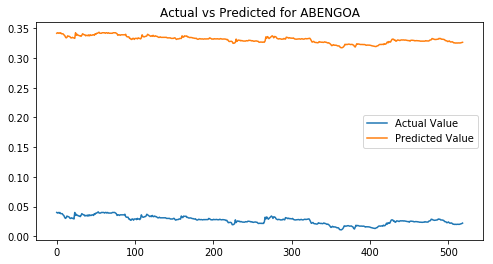

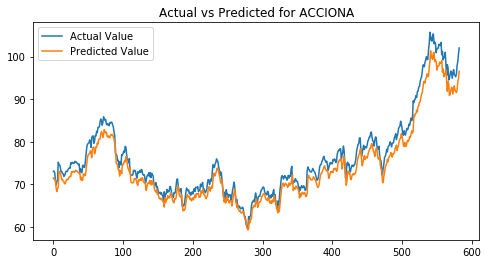

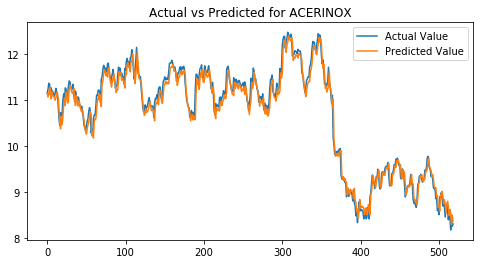

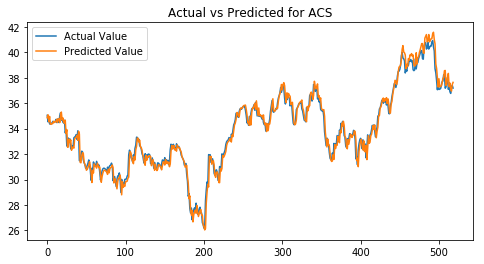

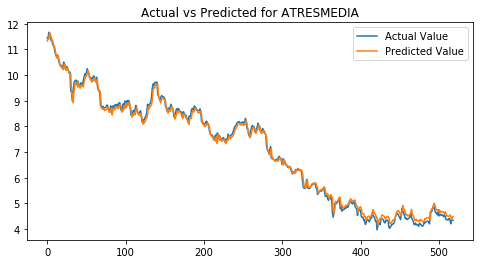

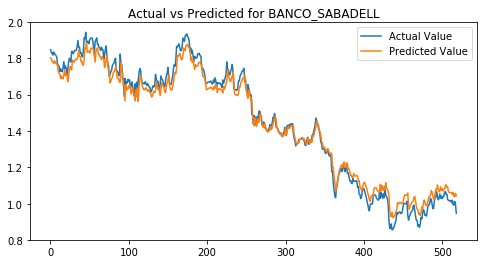

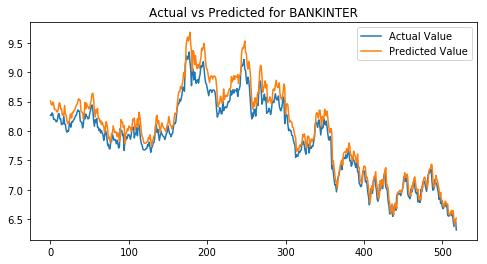

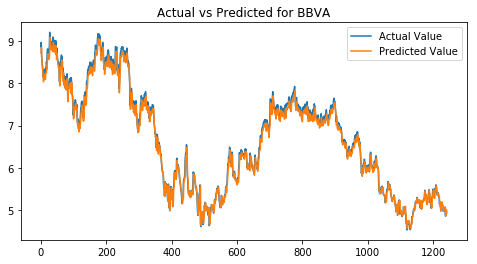

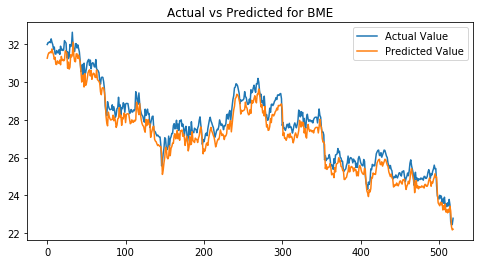

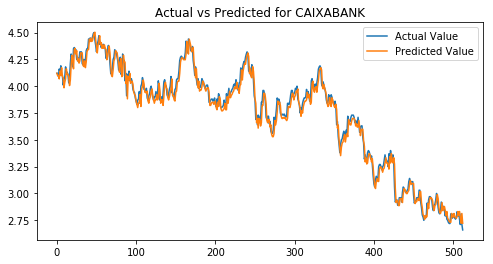

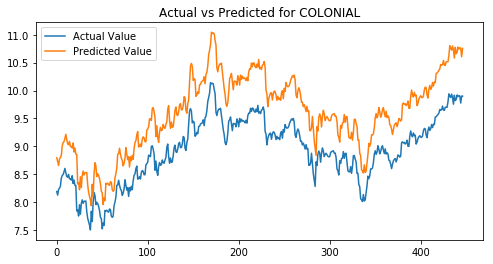

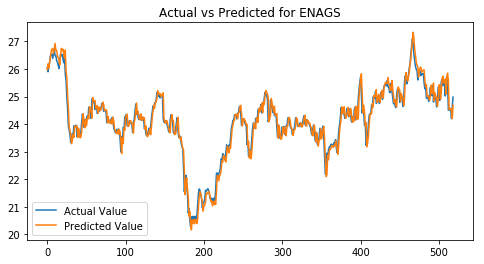

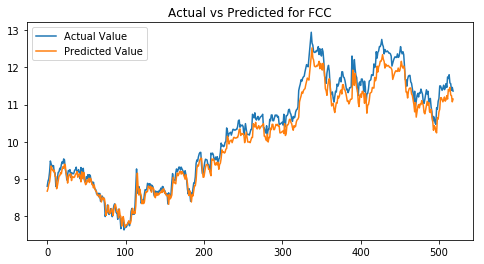

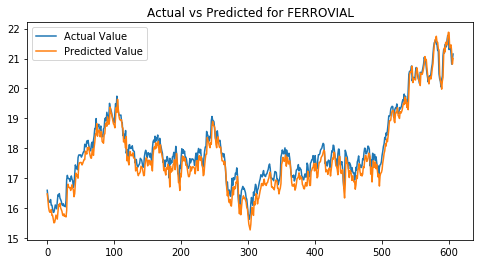

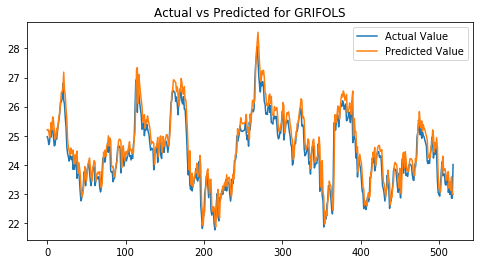

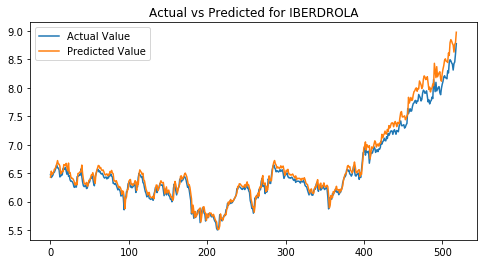

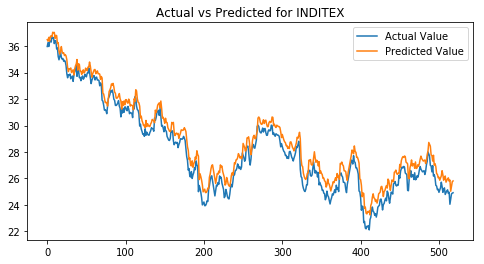

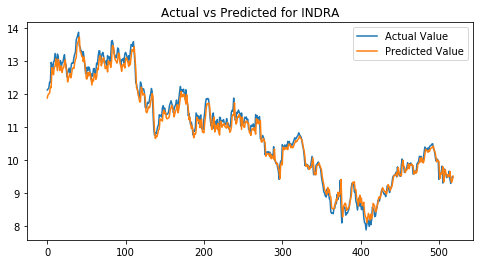

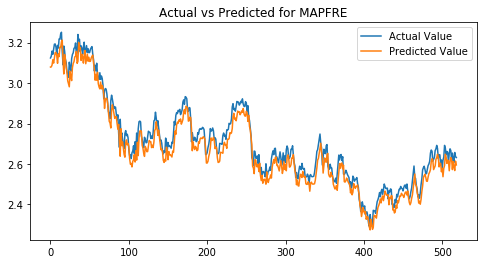

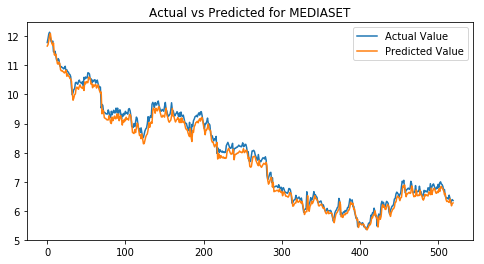

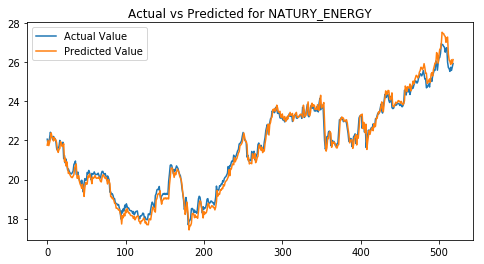

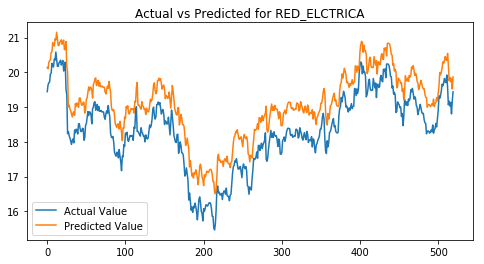

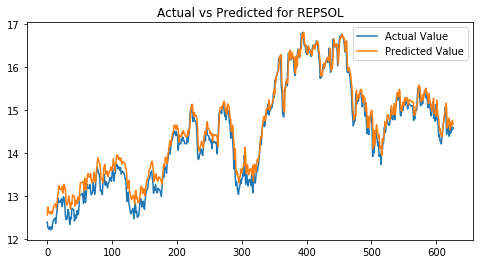

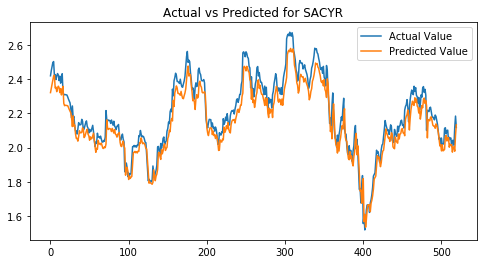

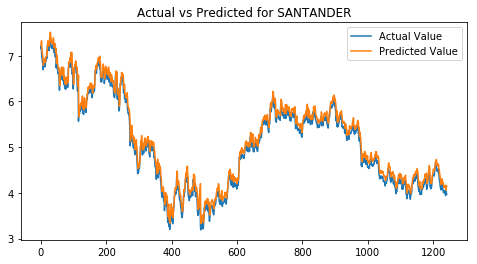

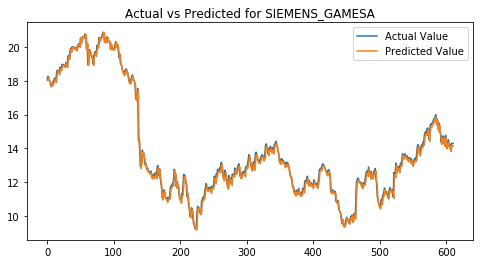

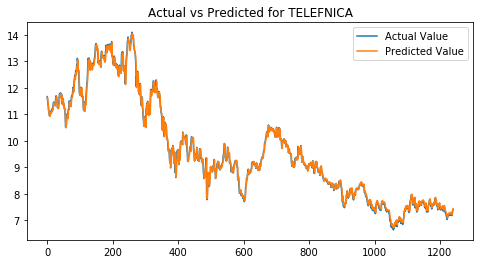

In [84]:
for df, title in zip(dataframes, titles):
    predictions(df, title)

C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
C:\Users\Sahil Nathani\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Fitting for x 


Train on 1976 samples, validate on 105 samples
Epoch 1/12
1976/1976 [==============================] - 29s 15ms/step - loss: 0.1530 - val_loss: 0.0151
Epoch 2/12
1976/1976 [==============================] - 1s 752us/step - loss: 0.0752 - val_loss: 0.0504
Epoch 3/12
1976/1976 [==============================] - 2s 794us/step - loss: 0.0428 - val_loss: 0.0355
Epoch 4/12
1976/1976 [==============================] - 2s 795us/step - loss: 0.0212 - val_loss: 0.0118
Epoch 5/12
1976/1976 [==============================] - 2s 898us/step - loss: 0.0056 - val_loss: 9.1982e-04
Epoch 6/12
1976/1976 [==============================] - 2s 868us/step - loss: 0.0024 - val_loss: 3.0859e-04
Epoch 7/12
1976/1976 [==============================] - 2s 858us/step - loss: 0.0024 - val_loss: 6.6060e-04
Epoch 8/12
1976/1976 [==============================] - 2s 944us/step - loss: 0.0021 - val_loss: 2.1755e-04
Epoch 9/12
1976/1976 [==============================] - 2s 937us/step - loss: 0.0022 - v

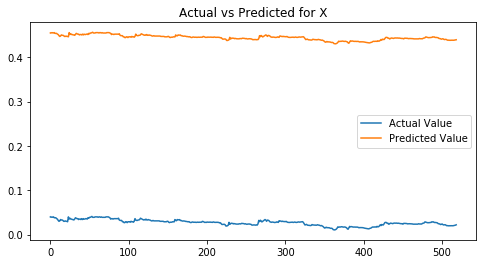

In [87]:
predictions(dataframes[0], 'x')